In [1]:
import pdb

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import radvel

import rvsearch
from rvsearch import utils

%matplotlib inline

# Make plots for ESS IV poster.

## Load all of the relevant data.

In [2]:
planets = pd.read_csv('planet_list_719.csv')
specmatch = pd.read_csv('legacy_tables/legacy_specmatch_medians.csv')

## Plot mass vs. semi-major-axis, one with MAP-values and one with MCMC medians & uncertainties.

In [66]:
planets_old = planets.query('status == "K"').reset_index()
planets_new = planets.query('status == "C"').reset_index()
print(len(planets_new))
print(len(planets_new.query('mass_plus < 15')))

# Find the weird error outlier among the old planets.
planets_old.query('mass_plus - mass_minus > 7 and mass_med < 40')

24
22


,index,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
46,74,74,159868,K,1.323571,2.174516,0.982371,9.534215,0.748103,7.479071e-01,...,2.273972e+02,2.283753e+02,42.811031,7.737763e+01,3.150021e+01,5.870378e+02,0.197521,0.444869,0.102892,0.856072
138,265,265,181234,K,5.504606,-1010.326479,-1086.396676,-971.500328,5.752607,1.615457e+10,...,9.257816e+14,5.934566e+18,81.897041,8.925343e+15,1.702627e+13,2.922670e+16,0.603131,0.428687,0.131252,0.758777


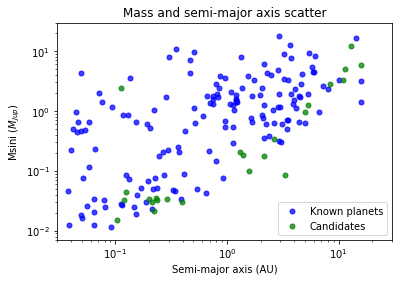

In [63]:
fig, ax = plt.subplots()
plt.title('Mass and semi-major axis scatter')
ax.scatter(planets_old.axis, planets_old.mass, c='b', alpha=0.75, label='Known planets')
ax.scatter(planets_new.axis, planets_new.mass, c='g', alpha=0.75, label='Candidates')
ax.set_xlim([3*10**-2, 30])
ax.set_ylim([7*10**-3, 30])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Msini ($M_{Jup}$)')
ax.legend()

fig.savefig()

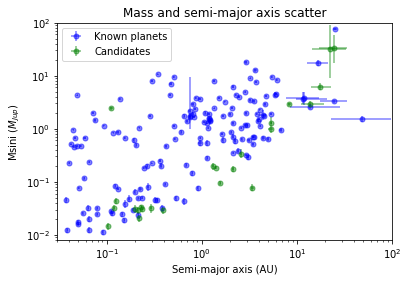

In [61]:
fig, ax = plt.subplots()
plt.title('Mass and semi-major axis scatter')

axerr_minus_old = planets_old.axis_med - planets_old.axis_minus
axerr_plus_old = planets_old.axis_plus - planets_old.axis_med
axerr_old = [axerr_minus_old, axerr_plus_old]
axerr_minus_new = planets_new.axis_med - planets_new.axis_minus
axerr_plus_new = planets_new.axis_plus - planets_new.axis_med
axerr_new = [axerr_minus_new, axerr_plus_new]

merr_minus_old = planets_old.mass_med - planets_old.mass_minus
merr_plus_old = planets_old.mass_plus - planets_old.mass_med
merr_old = [merr_minus_old, merr_plus_old]
merr_minus_new = planets_new.mass_med - planets_new.mass_minus
merr_plus_new = planets_new.mass_plus - planets_new.mass_med
merr_new = [merr_minus_new, merr_plus_new]

ax.errorbar(planets_old.axis_med, planets_old.mass_med, 
            xerr=axerr_old, yerr=merr_old, 
            fmt='o',c='b', alpha=0.5, label='Known planets')
ax.errorbar(planets_new.axis_med, planets_new.mass_med, 
            xerr=axerr_new, yerr=merr_new, 
            fmt='o',c='g', alpha=0.5, label='Candidates')

ax.set_xlim([3*10**-2, 10**2])
ax.set_ylim([8*10**-3, 10**2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Msini ($M_{Jup}$)')
ax.legend()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(spec_syn['teff_emp'], spec_syn['iso_logg'], 
           alpha=0.66, s=3*np.exp(-3*specmatch_legacy['fe']),
           label='Spec-Syn, $\propto e^{-[Fe/H]}$')

ax.set_title('Specmatch Syn & Emp, boundary Teff = 4700')
ax.scatter(spec_emp['teff_emp'], spec_emp['iso_logg'], 
           s=3*np.exp(-3*cut['fe']), 
           alpha=0.66, label='Spec-Emp')
ax.set_xlabel('Teff (K, empirical)')
ax.set_ylabel('log(g) (cm/s$^2$, synthetic)')
ax.set_ylim([4.9, 2.5])
ax.set_xlim([6700, 3000])
ax.legend()

#print(cut['name teff logg fe vsini'.split()])
fig.savefig('main_sequence_all.pdf')